# Behavioral Cloning with Keras Project - image preprocessing


## Load the data

In [6]:
# Load images into an array
from skimage.io import imread_collection
from skimage.io import imread
from skimage.io import concatenate_images
import numpy as np
import os
import numpy as np
from numpy import genfromtxt
import random
from scipy.misc import imresize
from skimage.transform import rotate
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
print("Loading center images...")
images_center = imread_collection('track1_IMG/center*.jpg')
image_array_center = concatenate_images(images_center)
print("Loading left images...")
images_left = imread_collection('track1_IMG/left*.jpg')
image_array_left = concatenate_images(images_left)
print("Loading right images...")
images_rigth = imread_collection('track1_IMG/right*.jpg')
image_array_right = concatenate_images(images_rigth)
print("Finished loading images.")
image_array = np.concatenate((image_array_center,image_array_left,image_array_right))

In [7]:
print("Loading center images...")
images_center = imread_collection('IMG/center*.jpg')
image_array_center = concatenate_images(images_center)

Loading center images...


In [8]:
image_array = image_array_center

In [9]:
int(len(image_array)/3)
for i in range(0,len(image_array),int(len(image_array)/3)):
    print("{} {}".format(i,image_array[i,0,0]))

0 [109 108 114]
3611 [112 141 181]
7222 [112 140 179]
10833 [135 167 205]


In [ ]:
from pandas import read_csv

def load_data():
    col_names = ['centre', 'left', 'right', 'angle', 'throttle', 'brake', 'speed']
    data = read_csv('driving_log.csv',header=None,names=col_names)
    centre_filename = data.centre.tolist()
    angle = data.angle.tolist()
    X_train, X_test, y_train, y_test = train_test_split(centre_filename, angle, test_size=0.2, random_state=36)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=36)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [10]:
from pandas import read_csv

In [61]:
col_names = ['centre', 'left', 'right', 'angle', 'throttle', 'brake', 'speed']
data = read_csv('driving_log.csv',header=None,names=col_names)

In [65]:
centre_filename = data.centre.tolist()
angle = data.angle.tolist()
print(centre_filename[0],angle[0])

/Users/aquraishi/Documents/aa Cingularity/Training & Manuals/Udacity Self-Driving Car/Session 1/14_Behavioral_Cloning/IMG/center_2017_01_30_18_37_46_870.jpg 0.0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(centre_filename, angle, test_size=0.2, random_state=36)
print("X_train: {}, X_test: {}".format(len(X_train),len(X_test)))

X_train: 8667, X_test: 2167


In [70]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=36)
print("X_train: {}, X_val: {}".format(len(X_train),len(X_val)))

X_train: 6933, X_val: 1734


In [73]:
np.random.randint(1000)

339

In [1]:
from skimage.io import imread
from skimage.io import concatenate_images
import numpy as np
import numpy as np
import random
from skimage.transform import rotate
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from pandas import read_csv

In [2]:
def load_data():
    col_names = ['centre', 'left', 'right', 'angle', 'throttle', 'brake', 'speed']
    data = read_csv('driving_log.csv',header=None,names=col_names)
    centre_filename = data.centre.tolist()
    angle = data.angle.tolist()
    X_train, X_test, y_train, y_test = train_test_split(centre_filename, angle, test_size=0.2, random_state=36)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=36)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = load_data()

In [4]:
t = X_train[0].split('/')
t[-1]

'center_2017_01_30_22_36_08_184.jpg'

In [13]:
image_dir = 'IMG'
path = image_dir + '/' + X_train[0].split('/')[-1]
path

'IMG/center_2017_01_30_21_35_15_028.jpg'

In [5]:
# Create a normalizer for both images and angles
def normalizer(array, min_max=(0,1), feature_range=(0, 1)):
    x_min = feature_range[0]
    x_max = feature_range[1]
    a = min_max[0]
    b = min_max[1]
    norm_features = (array-x_min)*(b-a)/(x_max - x_min) + a
    return norm_features

In [100]:
rotation_angle = 10

def data_generator(batch_size, images, angles, rotation_angle):
    images, angles = shuffle(images, angles)
    
    while True:
        X_data, y_data = [], []
        for index in range(batch_size):
            data_choice = np.random.randint(len(images))
            image = imread(images[data_choice])
            angle = angles[data_choice]
            # crop image
            image = image[60:,:,:][:66,:200,:]
            # rotate image by a random angle
            rotate_by = np.random.randint(-rotation_angle,rotation_angle)
            image = rotate(image,rotate_by)
            # normalize the image and angle
            image = normalizer(image, min_max=(0,1), feature_range=(0,255))
            angle = normalizer(angle, min_max=(-0.5,0.5), feature_range=(-1.0,1.0))
            # randomly flip image
            if np.random.randint(2) == 1:
                image = np.fliplr(image)
                angle = -angle
            # add data to the array
            X_data.append(image)
            y_data.append(angle)
        yield X_data, y_data

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = load_data()
train_generator = data_generator(batch_size=batch_size, images=X_train, angles=y_train, rotation_angle=rotation_angle)
val_generator = data_generator(batch_size=batch_size, images=X_train, angles=y_train, rotation_angle=rotation_angle)
history = model.fit_generator(train_datagenerator,samples_per_epoch=len(X_train), 
                              nb_epoch=nb_epoch, validation_data=val_generator,verbose=1)

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

datagen.fit(X_train)

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              samples_per_epoch=len(X_train), nb_epoch=nb_epoch,
                              validation_data=(X_validation, y_validation),verbose=1)


In [11]:
# Load Steering angles into array

print("Loading steering angles...")
file_data = genfromtxt('driving_log.csv', delimiter=',')
print("Finished loading steering angles.")

Loading steering angles...
Finished loading steering angles.


In [12]:
file_data.shape

(10834, 7)

In [13]:
angle = file_data[...,3]
angle = file_data[:,3]
file = file_data[:,0]
#angle = np.concatenate((angle,angle,angle))
print(angle[30], str(file[30]))

-0.1866376 nan


In [14]:
index = random.randint(0, len(image_array))
angle[index]

0.0

Angle of  0.0
Image at index:  9982
Image dimensions are  (160, 320, 3)


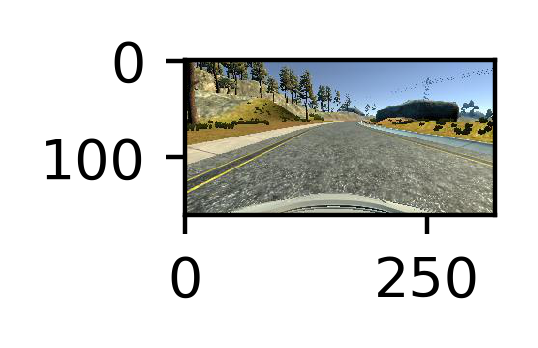

In [28]:
# Visualize the images
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

image = image_array[index]

plt.figure(figsize=(1,1),dpi=400)
plt.imshow(image)
print("Angle of ",angle[index])
print("Image at index: ", index)
print("Image dimensions are ", image.shape)

6


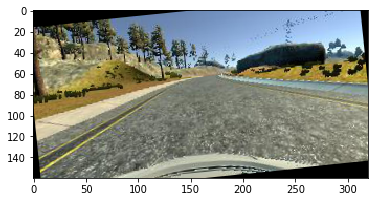

In [29]:
from skimage.transform import rotate
rotate_by = 6
print(rotate_by)
image = rotate(image, rotate_by)
plt.imshow(image)

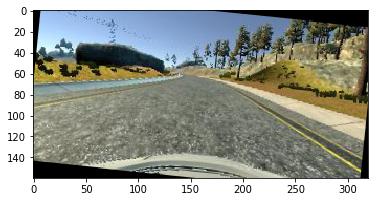

In [30]:
image = np.fliplr(image)
plt.imshow(image)

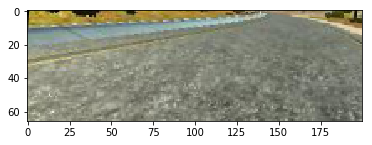

In [31]:
image = image[60:, :, :][:66, :200, :]
plt.imshow(image)

# Preprocessing

## Normalize function

In [14]:
def normalizer(array, min_max=(0,1), feature_range=(0, 1)):
    x_min = feature_range[0]
    x_max = feature_range[1]
    a = min_max[0]
    b = min_max[1]
    norm_features = (array-x_min)*(b-a)/(x_max - x_min) + a
    return norm_features

## Normalize steering angle

I decided to normalize the steering angle to between -0.5 and 0.5 to have a unit spread and a mean of 0.

Steering of -1 correspnds to -25 degrees and 1 +25 degrees.

In [15]:
# Normalize the steering angles to between -0.5 and 0.5. They are currently recorded to between -1.0 and 1.0
print("Normalizing steering angles...")
angle_nomalized = normalizer(angle, min_max=(-0.5,0.5), feature_range=(-1.0,1.0))
print("Steering angles normalized")

Normalizing steering angles...
Steering angles normalized


## Reduce image size
Don't need as many features which will overly complexify the training

In [12]:
from scipy.misc import imresize

(66, 200, 3)


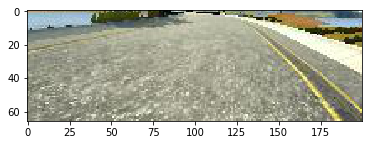

In [22]:
#image2 = imresize(image, (150,300,3))[16:,:,:][:66,:200,:]
image2 = image[60:,:,:][:66,:200,:]
print(image2.shape)
plt.imshow(image2)

In [16]:
resized_images = [imresize(image, (100,200,3))[16:,:,:][:66,:,:] for image in image_array]
resized_images = np.array(resized_images)

In [17]:
plt.imshow(resized_images[index])
print(resized_images.shape)

IndexError: index 7547 is out of bounds for axis 0 with size 66

In [20]:
resized_images[index,0,0]

array([173, 207, 252], dtype=uint8)

## Normalize image channels

I normalized the image channels to between 0 and 1, moving 0 to 0 and 255 to 1

In [21]:
# Normalize the image channels to between 0 and 1
print("Normalizing image channels...")
normalized_images = normalizer(resized_images, min_max=(0,1), feature_range=(0,255))
print("Normalization complete")

Normalizing image channels...
Normalization complete


In [22]:
print(image_array[0,0,0])
print(resized_images[0,0,0])
print(normalized_images[0,0,0])

[116 145 185]
[109 124  90]
[ 0.42745098  0.48627451  0.35294118]


# Shuffle the data

In [23]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(normalized_images, angle_nomalized)

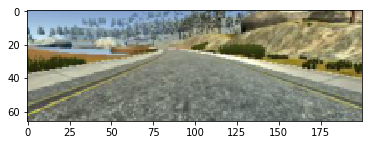

In [24]:
plt.imshow(X_train[index])

## Split the data into train, validation and test data

In [25]:
# Perform a train / test split

from sklearn.model_selection import train_test_split

print("Split into train, validation and test data")
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4, random_state=36)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=97)
print("Train size {}, validation size {}, test size {}".format(len(y_train), len(y_validation), len(y_test)))

Split into train, validation and test data
Train size 2844, validation size 712, test size 2372


## Save the data into a pickle so we don't have to process every time

In [26]:
import pickle

pickle_out = open('image_data.pkl', 'wb')
pickle.dump([X_train, X_validation, X_test, y_train, y_validation, y_test], pickle_out)
pickle_out.close()